# Gaussian Mixture Model on Fermi T90-HR data

The data are taken from Goldstein, et al. 2017 (on a request to Goldstein, A., Veres, P., Burns, E., et al. 2017, ApJL, 848, L14, doi: 10.3847/2041-8213/aa8f41). 


We draw finally contours of probability for a GRB being a short GRB. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from matplotlib.colors import LogNorm
from sklearn import mixture




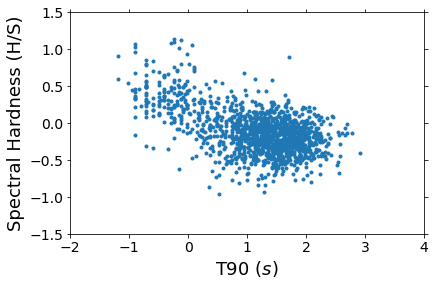

In [5]:
# And now Godstein results
Gold_data = ascii.read('data_LogT90_LogH32.txt', header_start = None, data_start=1, comment= '#')


logT90 = np.array(Gold_data['col1'])
logHR = np.array(Gold_data['col2'])

fig, ax = plt.subplots()



ax.plot(logT90, logHR, '.')#, color=colorFader(c1,c2, probShort[i])) 
ax.set_xlabel(r'T90 ($s$)',fontsize=18)
ax.set_ylabel(r'Spectral Hardness (H/S)',fontsize=18)

plt.xlim(-2, 4)
plt.ylim(-1.5, 1.5)

plt.tight_layout()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Goldstein2017_HR_T90.pdf', format='pdf')
plt.show()



In [8]:
HR_T90 = np.vstack((logT90, logHR)).T
print(HR_T90.shape)

T90_FERMI = logT90
HR_FERMI = logHR

HR_T90_FERMI = HR_T90


(1371, 2)


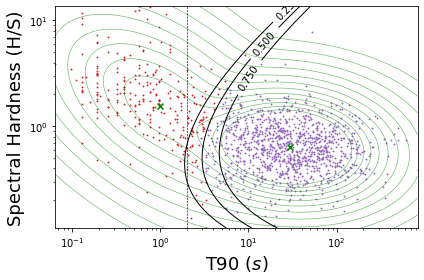

In [22]:
fig, ax = plt.subplots()


gmm_Fermi1 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(HR_T90_FERMI)
Y_ = gmm_Fermi1.predict(HR_T90_FERMI)

#print(Y_)

xx = np.linspace(np.min(T90_FERMI),np.max(T90_FERMI), 2000)
yy = np.linspace(np.min(HR_FERMI),np.max(HR_FERMI), 2000)
XX, YY = np.meshgrid(xx, yy)
XY = np.array([XX.ravel(), YY.ravel()]).T
Z = -gmm_Fermi1.score_samples(XY)
Z = Z.reshape(XX.shape)
CS = ax.contour(10**XX, 10**YY, Z, levels=np.logspace(0, 1, 12), colors = 'g',
                    alpha = 0.6, linewidths = 0.6)

#print(np.logspace(0, 1, 12))

ax.axvline(2, c= 'k', linestyle = '--', linewidth = 0.6)
ax.scatter(10**HR_T90_FERMI[Y_ == 0, 0], 10**HR_T90_FERMI[Y_ == 0, 1], marker = '.', color = 'tab:red', s = 3)
ax.scatter(10**HR_T90_FERMI[Y_ == 1, 0], 10**HR_T90_FERMI[Y_ == 1, 1], marker = '.', color = 'tab:purple', s = 3)
ax.scatter(10**gmm_Fermi1.means_[:,0], 10**gmm_Fermi1.means_[:,1], marker = 'x', color = 'g')


# Probabilities
Zprob = gmm_Fermi1.predict_proba(XY).T
GRBshortProb = Zprob[1,:]
GRBshortProb1 = GRBshortProb.reshape(XX.shape)


CS = ax.contour(10**XX, 10**YY, GRBshortProb1, levels=[0.25, 0.5, 0.75], colors = 'k',
                    alpha = 1, linewidths = 1)
ax.set_xscale('log')
ax.set_yscale('log')
#print(np.logspace(0, 1, 12))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel(r'T90 ($s$)',fontsize=18)
ax.set_ylabel(r'Spectral Hardness (H/S)',fontsize=18)
plt.tight_layout()
plt.show()

# Results of the fit


In [21]:
weights = gmm_Fermi1.weights_
means = gmm_Fermi1.means_
covariances  = gmm_Fermi1.covariances_  

print("Weights: %s \n Means: %s \n Covariances: %s"%(weights, means, covariances))

Weights: [0.78462156 0.21537844] 
 Means: [[ 1.46900506 -0.1954107 ]
 [-0.00599655  0.19438652]] 
 Covariances: [[[ 0.20293651 -0.01127417]
  [-0.01127417  0.05044604]]

 [[ 0.28188776 -0.10270718]
  [-0.10270718  0.13582114]]]
